In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text 
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report,r2_score,mean_squared_error
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from graphviz import Source
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_cancer = pd.read_excel("/content/drive/MyDrive/survey lung cancer2.xlsx")
df_cancer.head(20)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69.0,NaN,NaN,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,YES
1,M,74.0,2.0,NaN,NaN,1.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,YES
2,F,8.0,1.0,NaN,NaN,2.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,NO
3,M,63.0,NaN,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,NO
4,F,63.0,1.0,2.0,NaN,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,NO
5,F,75.0,1.0,NaN,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,YES
6,M,52.0,NaN,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,YES
7,O,51.0,2.0,2.0,2.0,A,1.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,YES
8,F,68.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NO
9,M,53.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,YES


In [ ]:
df_cancer.shape

(309, 16)

In [ ]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   GENDER                 309 non-null    object 
 1   AGE                    309 non-null    float64
 2   SMOKING                292 non-null    float64
 3   YELLOW_FINGERS         295 non-null    float64
 4   ANXIETY                272 non-null    float64
 5   PEER_PRESSURE          307 non-null    object 
 6   CHRONIC DISEASE        309 non-null    float64
 7   FATIGUE                309 non-null    float64
 8   ALLERGY                309 non-null    float64
 9   WHEEZING               309 non-null    float64
 10  ALCOHOL CONSUMING      309 non-null    float64
 11  COUGHING               309 non-null    float64
 12  SHORTNESS OF BREATH    309 non-null    float64
 13  SWALLOWING DIFFICULTY  309 non-null    float64
 14  CHEST PAIN             309 non-null    float64
 15  LUNG_C

In [ ]:
s=df_cancer.isnull().sum()
s

GENDER                    0
AGE                       0
SMOKING                  17
YELLOW_FINGERS           14
ANXIETY                  37
PEER_PRESSURE             2
CHRONIC DISEASE           0
FATIGUE                   0
ALLERGY                   0
WHEEZING                  0
ALCOHOL CONSUMING         0
COUGHING                  0
SHORTNESS OF BREATH       0
SWALLOWING DIFFICULTY     0
CHEST PAIN                0
LUNG_CANCER               0
dtype: int64

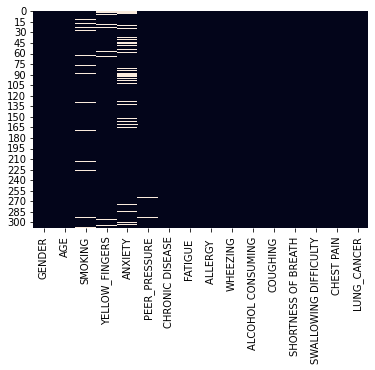

In [ ]:
sns.heatmap(df_cancer.isnull(),cbar=False) 
plt.show()

In [ ]:
df_cancer.duplicated().sum()

14

In [ ]:
df_cancer.drop_duplicates(inplace=True)
df_cancer.shape

(295, 16)

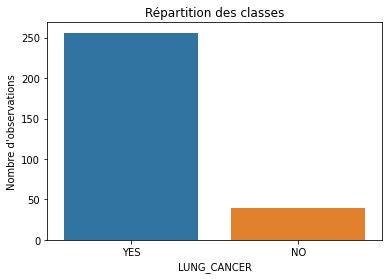

Nb OBS classe no= 39
Nb OBS classe yes= 256


In [ ]:
plt.title("Répartition des classes")
sns.countplot(x="LUNG_CANCER", data=df_cancer) 
plt.ylabel("Nombre d'observations")
plt.show()
print("Nb OBS classe no=",len(df_cancer[df_cancer['LUNG_CANCER']=="NO"])) 
print("Nb OBS classe yes=",len(df_cancer[df_cancer['LUNG_CANCER']=="YES"])) 

In [ ]:
#df_cancer.dropna(thresh=13, inplace=True)  
#df_cancer.reset_index(drop=True, inplace=True)


In [ ]:
df_cancer.shape

(295, 16)

In [ ]:
df_cancer.isnull().sum(axis=1)

0      2
1      2
2      2
3      1
4      1
      ..
301    1
303    0
304    1
305    1
308    1
Length: 295, dtype: int64

In [ ]:
df_cancer.isnull().sum(axis=0)


GENDER                    0
AGE                       0
SMOKING                  17
YELLOW_FINGERS           14
ANXIETY                  37
PEER_PRESSURE             2
CHRONIC DISEASE           0
FATIGUE                   0
ALLERGY                   0
WHEEZING                  0
ALCOHOL CONSUMING         0
COUGHING                  0
SHORTNESS OF BREATH       0
SWALLOWING DIFFICULTY     0
CHEST PAIN                0
LUNG_CANCER               0
dtype: int64

In [ ]:
df_cancer.dropna(subset=['PEER_PRESSURE'],inplace=True) 
df_cancer.reset_index(drop=True,inplace=True) 
df_cancer.head(10)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69.0,NaN,NaN,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,YES
1,M,74.0,2.0,NaN,NaN,1.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,YES
2,F,8.0,1.0,NaN,NaN,2.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,NO
3,M,63.0,NaN,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,NO
4,F,63.0,1.0,2.0,NaN,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,NO
5,F,75.0,1.0,NaN,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,YES
6,M,52.0,NaN,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,YES
7,O,51.0,2.0,2.0,2.0,A,1.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,YES
8,F,68.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NO
9,M,53.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,YES


In [ ]:
df_cancer.shape

(293, 16)

In [ ]:
df_cancer.YELLOW_FINGERS.fillna(2,inplace=True)

In [ ]:
df_cancer.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69.0,NaN,2.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,YES
1,M,74.0,2.0,2.0,NaN,1.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,YES
2,F,8.0,1.0,2.0,NaN,2.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,NO
3,M,63.0,NaN,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,NO
4,F,63.0,1.0,2.0,NaN,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,NO


In [ ]:
most_f_imputer=SimpleImputer(missing_values=np.nan,strategy='mean') 
arr=most_f_imputer.fit_transform(df_cancer[['SMOKING']]) 
df_cancer['SMOKING']=pd.DataFrame(arr,columns=['SMOKING'])

In [ ]:
most_f_imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent') 
arr=most_f_imputer.fit_transform(df_cancer[['ANXIETY']]) 
df_cancer['ANXIETY']=pd.DataFrame(arr,columns=['ANXIETY'])

In [ ]:
df_cancer.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

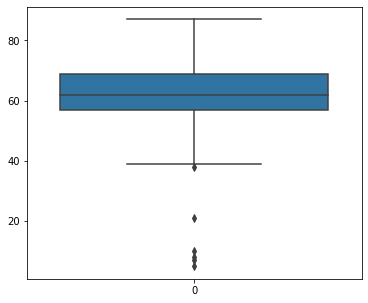

In [ ]:
plt.figure(figsize=(6,5))
sns.boxplot(data=df_cancer.loc[:,'AGE'])

In [ ]:
percentile25 = df_cancer['AGE'].quantile(0.25)
percentile75 = df_cancer['AGE'].quantile(0.75)
upper_limit = percentile75 + 1.5 * (percentile75-percentile25)
lower_limit = percentile25 - 1.5 * (percentile75-percentile25)

In [ ]:
df_cancer['AGE'] = np.where(df_cancer['AGE'] >= upper_limit,
        upper_limit,
        np.where(df_cancer['AGE'] <= lower_limit,
        lower_limit,
        df_cancer['AGE']))

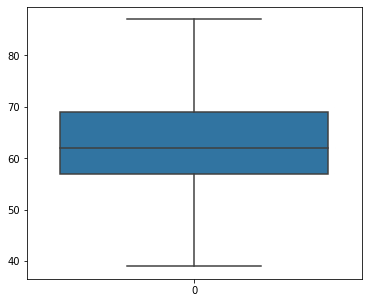

In [ ]:
plt.figure(figsize=(6,5))
sns.boxplot(data=df_cancer.loc[:,'AGE'])

In [ ]:
numeric_cols = df_cancer._get_numeric_data().columns  # numeric columns
cols = df_cancer.columns  # all columns
categorical_cols = list(set(cols) - set(numeric_cols))
categorical_cols 

['GENDER', 'LUNG_CANCER', 'PEER_PRESSURE']

In [ ]:
df_cancer['GENDER'] = df_cancer['GENDER'].replace("O","F")
df_cancer.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69.0,1.545126,2.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,YES
1,M,74.0,2.000000,2.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,YES
2,F,39.0,1.000000,2.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,NO
3,M,63.0,1.545126,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,NO
4,F,63.0,1.000000,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,NO


In [ ]:
df_cancer['PEER_PRESSURE'] = df_cancer['PEER_PRESSURE'].replace("A",2)
df_cancer.head(12)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69.0,1.545126,2.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,YES
1,M,74.0,2.000000,2.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,YES
2,F,39.0,1.000000,2.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,NO
3,M,63.0,1.545126,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,NO
4,F,63.0,1.000000,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,NO
5,F,75.0,1.000000,2.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,YES
6,M,52.0,1.545126,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,YES
7,F,51.0,2.000000,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,YES
8,F,68.0,2.000000,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NO
9,M,53.0,2.000000,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,YES


In [ ]:
numeric_cols = df_cancer._get_numeric_data().columns  
cols = df_cancer.columns 
categorical_cols = list(set(cols) - set(numeric_cols))
categorical_cols 

['GENDER', 'LUNG_CANCER']

In [ ]:
enc=OrdinalEncoder() 
df_cancer['GENDER']=enc.fit_transform(df_cancer[['GENDER']]) 

In [ ]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   GENDER                 293 non-null    float64
 1   AGE                    293 non-null    float64
 2   SMOKING                293 non-null    float64
 3   YELLOW_FINGERS         293 non-null    float64
 4   ANXIETY                293 non-null    float64
 5   PEER_PRESSURE          293 non-null    float64
 6   CHRONIC DISEASE        293 non-null    float64
 7   FATIGUE                293 non-null    float64
 8   ALLERGY                293 non-null    float64
 9   WHEEZING               293 non-null    float64
 10  ALCOHOL CONSUMING      293 non-null    float64
 11  COUGHING               293 non-null    float64
 12  SHORTNESS OF BREATH    293 non-null    float64
 13  SWALLOWING DIFFICULTY  293 non-null    float64
 14  CHEST PAIN             293 non-null    float64
 15  LUNG_C

In [ ]:
X=df_cancer.iloc[:,:-1].values
Y=df_cancer.iloc[:,-1].values
print(X)
print(Y)

[[ 1.         69.          1.54512635 ...  2.          2.
   2.        ]
 [ 1.         74.          2.         ...  2.          2.
   2.        ]
 [ 0.         39.          1.         ...  2.          1.
   2.        ]
 ...
 [ 0.         56.          1.         ...  2.          2.
   1.        ]
 [ 1.         70.          2.         ...  2.          1.
   2.        ]
 [ 1.         62.          1.54512635 ...  1.          2.
   1.        ]]
['YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'YES' 'YES' 'YES' 'NO'
 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'YES' 'YES' 'NO' 'YES' 'YES'
 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO'
 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'NO'
 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'NO'
 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES'
 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'YES'
 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' '

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1,shuffle=False)

In [ ]:
cls_cancer1 =DecisionTreeClassifier()  
cls_cancer1.fit(X_train,Y_train) 
cls_cancer1.classes_

array(['NO', 'YES'], dtype=object)

In [ ]:
print(accuracy_score(Y_train,cls_cancer1.predict(X_train)))

1.0


In [ ]:
print(accuracy_score(Y_test,cls_cancer1.predict(X_test)))

0.9204545454545454


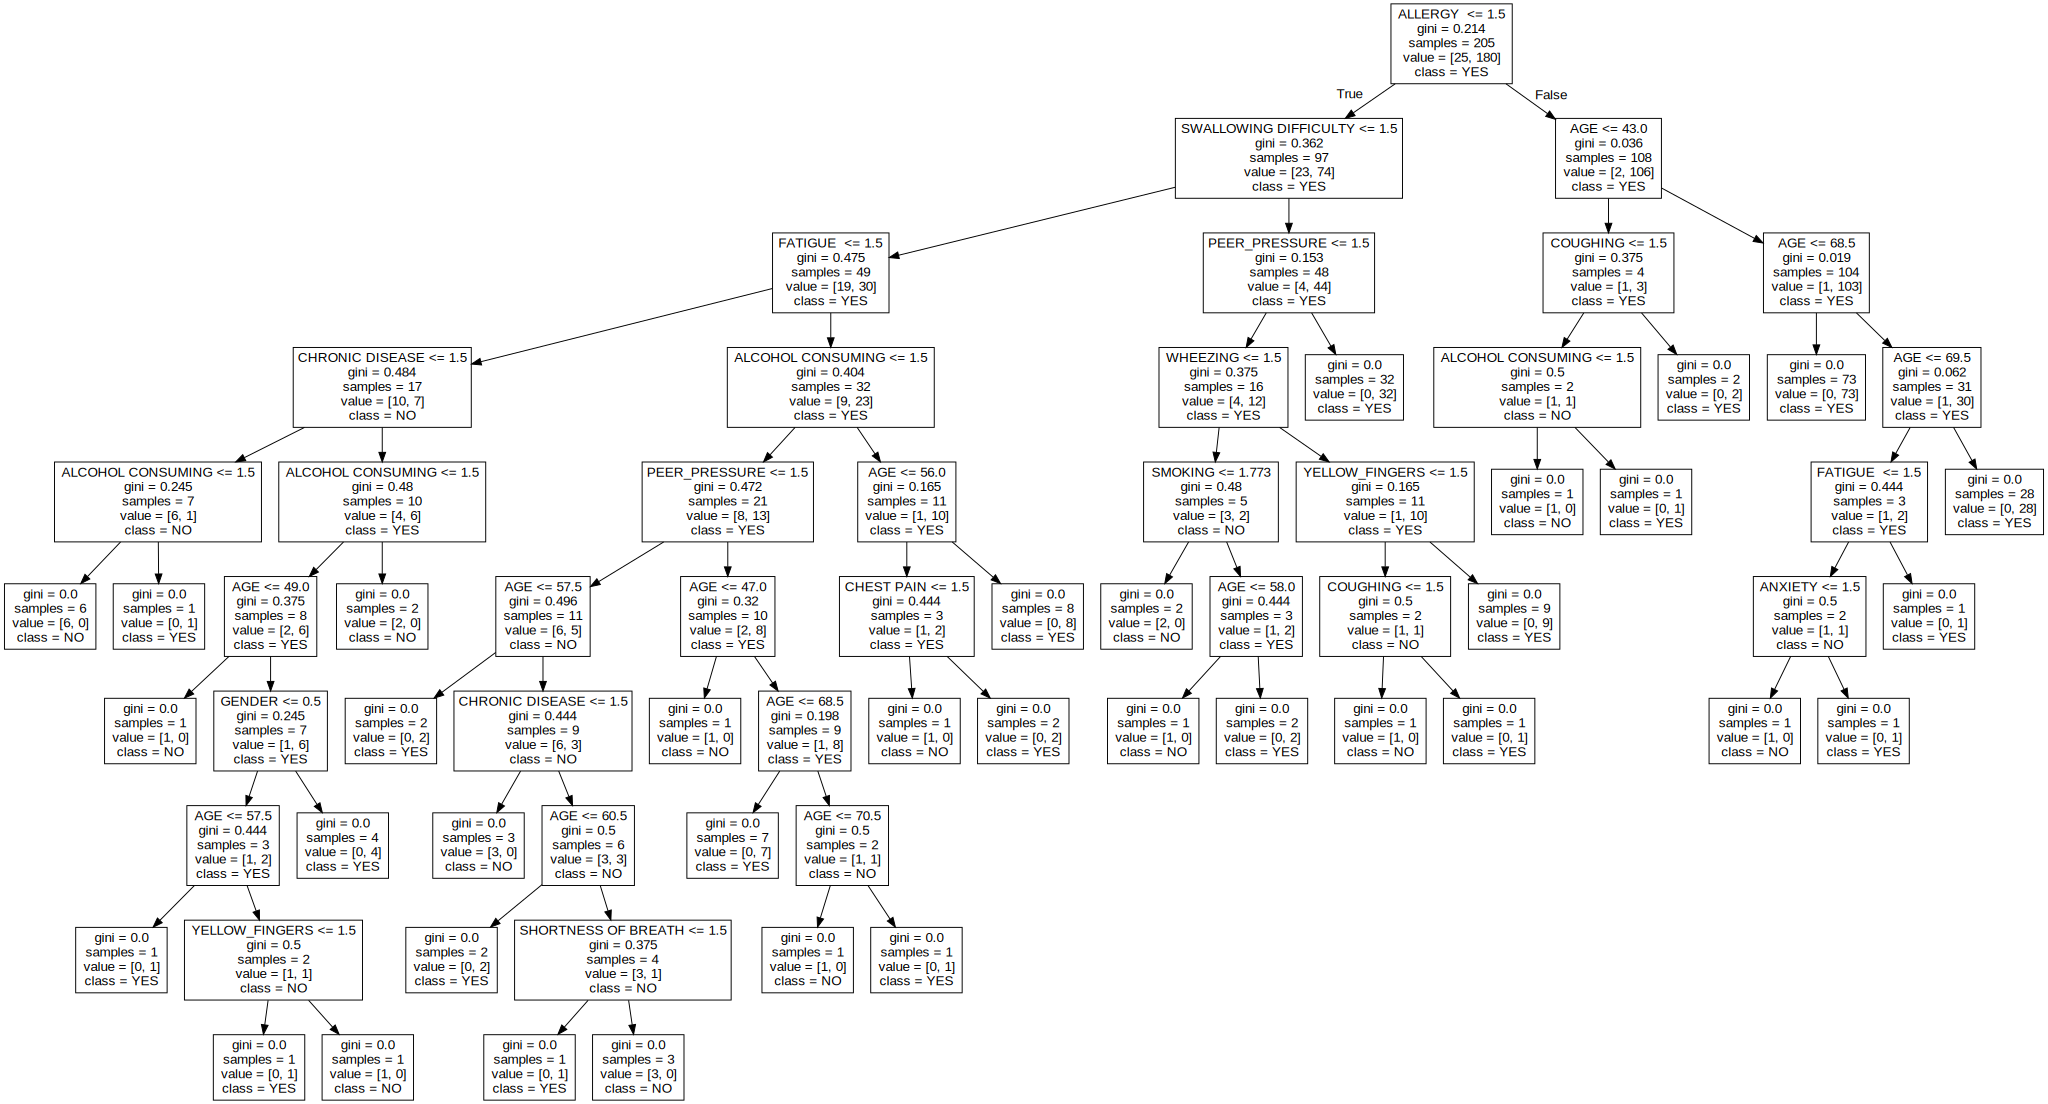

In [ ]:
features=list(df_cancer) 
dot_data=export_graphviz(cls_cancer1,feature_names=features[:len(features)-1],class_names=cls_cancer1.classes_)   
Source(dot_data)

In [ ]:
r=export_text(cls_cancer1,feature_names=features[:len(features)-1])
print(r) 

|--- ALLERGY  <= 1.50
|   |--- SWALLOWING DIFFICULTY <= 1.50
|   |   |--- FATIGUE  <= 1.50
|   |   |   |--- CHRONIC DISEASE <= 1.50
|   |   |   |   |--- ALCOHOL CONSUMING <= 1.50
|   |   |   |   |   |--- class: NO
|   |   |   |   |--- ALCOHOL CONSUMING >  1.50
|   |   |   |   |   |--- class: YES
|   |   |   |--- CHRONIC DISEASE >  1.50
|   |   |   |   |--- ALCOHOL CONSUMING <= 1.50
|   |   |   |   |   |--- AGE <= 49.00
|   |   |   |   |   |   |--- class: NO
|   |   |   |   |   |--- AGE >  49.00
|   |   |   |   |   |   |--- GENDER <= 0.50
|   |   |   |   |   |   |   |--- AGE <= 57.50
|   |   |   |   |   |   |   |   |--- class: YES
|   |   |   |   |   |   |   |--- AGE >  57.50
|   |   |   |   |   |   |   |   |--- YELLOW_FINGERS <= 1.50
|   |   |   |   |   |   |   |   |   |--- class: YES
|   |   |   |   |   |   |   |   |--- YELLOW_FINGERS >  1.50
|   |   |   |   |   |   |   |   |   |--- class: NO
|   |   |   |   |   |   |--- GENDER >  0.50
|   |   |   |   |   |   |   |--- class: YES
|   |

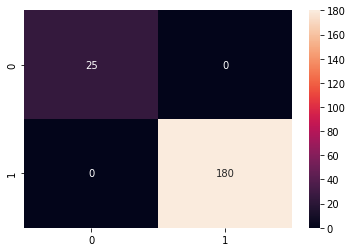

In [ ]:
pred_labels=cls_cancer1.predict(X_train)
cm=confusion_matrix(Y_train,pred_labels)
sns.heatmap(cm,annot=True,fmt='d')

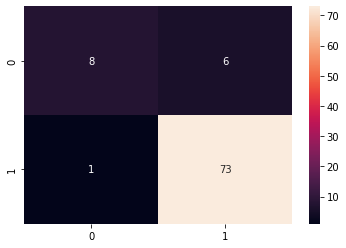

In [ ]:
pred_labels=cls_cancer1.predict(X_test)
cm=confusion_matrix(Y_test,pred_labels)
sns.heatmap(cm,annot=True,fmt='d')

In [ ]:
print(classification_report(Y_train,cls_cancer1.predict(X_train)))

              precision    recall  f1-score   support

          NO       1.00      1.00      1.00        25
         YES       1.00      1.00      1.00       180

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



In [ ]:
print(classification_report(Y_test,cls_cancer1.predict(X_test)))

              precision    recall  f1-score   support

          NO       0.89      0.57      0.70        14
         YES       0.92      0.99      0.95        74

    accuracy                           0.92        88
   macro avg       0.91      0.78      0.82        88
weighted avg       0.92      0.92      0.91        88



['NO' 'YES']


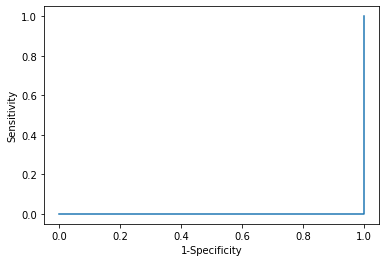

AUC= 0.0


In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score 
ar=cls_cancer1.predict_proba(X_train)[:,0]
print(cls_cancer1.classes_)
fpr, tpr, thresholds =roc_curve(Y_train,ar,pos_label='YES')
plt.plot(fpr, tpr)
plt.xlabel("1-Specificity")
plt.ylabel("Sensitivity")
plt.show()
auc_dt = roc_auc_score(Y_train,ar)
print("AUC=", auc_dt)

['NO' 'YES']


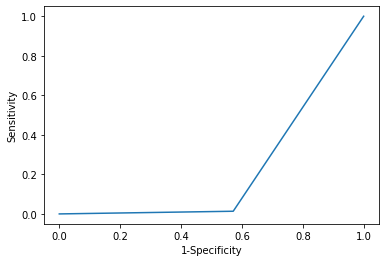

AUC= 0.22104247104247107


In [ ]:
 
ar=cls_cancer1.predict_proba(X_test)[:,0]
print(cls_cancer1.classes_)
fpr, tpr, thresholds =roc_curve(Y_test,ar,pos_label='YES')
plt.plot(fpr, tpr)
plt.xlabel("1-Specificity")
plt.ylabel("Sensitivity")
plt.show()
auc_dt = roc_auc_score(Y_test,ar)
print("AUC=", auc_dt)

['NO' 'YES']


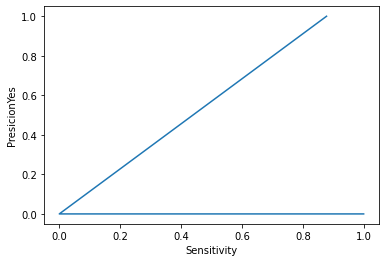

In [ ]:
from sklearn.metrics import precision_recall_curve 
ar=cls_cancer1.predict_proba(X_train)[:,0]
print(cls_cancer1.classes_)
fpr, tpr,thresholds=precision_recall_curve(Y_train,ar,pos_label='YES')
plt.plot(fpr, tpr)
plt.xlabel("Sensitivity")
plt.ylabel("PresicionYes")
plt.show()

['NO' 'YES']


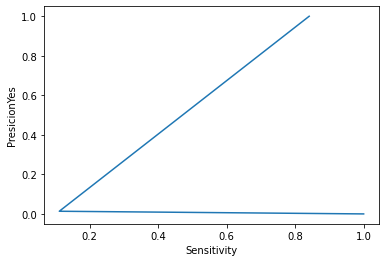

In [ ]:
from sklearn.metrics import precision_recall_curve 
ar=cls_cancer1.predict_proba(X_test)[:,0]
print(cls_cancer1.classes_)
fpr, tpr,thresholds=precision_recall_curve(Y_test,ar,pos_label='YES')
plt.plot(fpr, tpr)
plt.xlabel("Sensitivity")
plt.ylabel("PresicionYes")
plt.show()

In [ ]:
cls_cancer2=RandomForestClassifier(n_estimators=70,max_features="auto",bootstrap=True,max_samples=0.63,oob_score=True)
cls_cancer2.fit(X_train,Y_train)

RandomForestClassifier(max_samples=0.63, n_estimators=70, oob_score=True)

In [ ]:
print(accuracy_score(Y_train,cls_cancer2.predict(X_train)))

0.9853658536585366


In [ ]:
print(accuracy_score(Y_test,cls_cancer2.predict(X_test)))

0.8977272727272727


In [ ]:
print(cls_cancer2.oob_score_)

0.8731707317073171


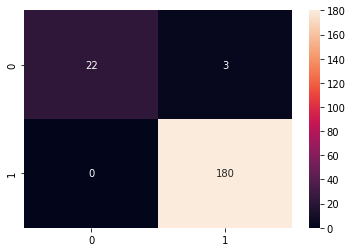

In [ ]:
pred_labels=cls_cancer2.predict(X_train)
cm=confusion_matrix(Y_train,pred_labels)
sns.heatmap(cm,annot=True,fmt='d')

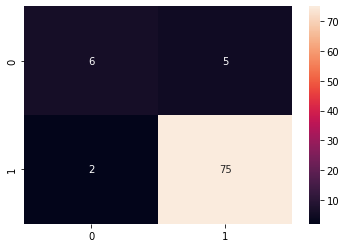

In [ ]:
pred_labels=cls_cancer2.predict(X_test)
cm=confusion_matrix(Y_test,pred_labels)
sns.heatmap(cm,annot=True,fmt='d')

In [ ]:
print(classification_report(Y_train,cls_cancer2.predict(X_train)))

              precision    recall  f1-score   support

          NO       1.00      0.93      0.96        28
         YES       0.99      1.00      0.99       177

    accuracy                           0.99       205
   macro avg       0.99      0.96      0.98       205
weighted avg       0.99      0.99      0.99       205



In [ ]:
print(classification_report(Y_test,cls_cancer2.predict(X_test)))

              precision    recall  f1-score   support

          NO       0.75      0.55      0.63        11
         YES       0.94      0.97      0.96        77

    accuracy                           0.92        88
   macro avg       0.84      0.76      0.79        88
weighted avg       0.91      0.92      0.91        88



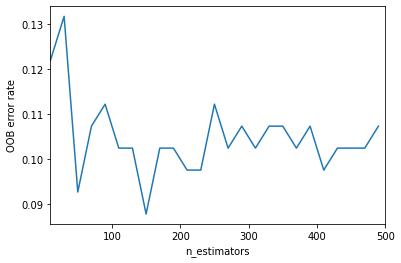

n_estimators*= 150


In [ ]:
min_estimators = 10
max_estimators = 500
error_rate=[]
nbt=list(range(10, 500,20))
for i in nbt :
  cls_cancer2.set_params(n_estimators=i)
  cls_cancer2.fit(X_train,Y_train)
  oob_error = 1 - cls_cancer2.oob_score_
  error_rate.append(oob_error)
plt.plot(nbt, error_rate)
plt.xlim(10, 500)
plt.xlabel("n_estimators"); plt.ylabel("OOB error rate")
plt.show()
min_value = min(error_rate)
print ("n_estimators*=", nbt[error_rate.index(min_value)])

['NO' 'YES']


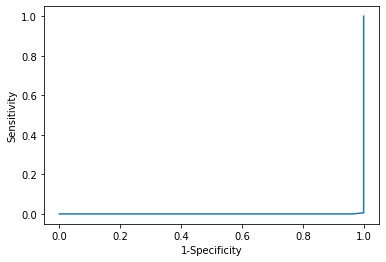

AUC= 0.00010088781275221949


In [ ]:
ar=cls_cancer2.predict_proba(X_train)[:,0]
print(cls_cancer2.classes_)
fpr, tpr, thresholds =roc_curve(Y_train,ar,pos_label='YES')
plt.plot(fpr, tpr)
plt.xlabel("1-Specificity")
plt.ylabel("Sensitivity")
plt.show()
auc_dt = roc_auc_score(Y_train,ar)
print("AUC=", auc_dt)

['NO' 'YES']


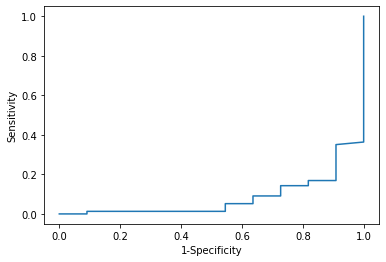

AUC= 0.0796930342384888


In [ ]:
ar=cls_cancer2.predict_proba(X_test)[:,0]
print(cls_cancer2.classes_)
fpr, tpr, thresholds =roc_curve(Y_test,ar,pos_label='YES')
plt.plot(fpr, tpr)
plt.xlabel("1-Specificity")
plt.ylabel("Sensitivity")
plt.show()
auc_dt = roc_auc_score(Y_test,ar)
print("AUC=", auc_dt)

['NO' 'YES']


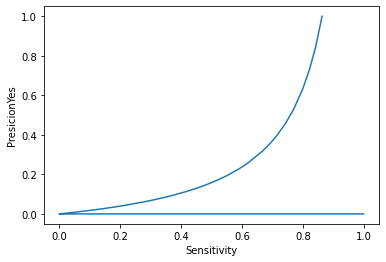

In [ ]:
ar=cls_cancer2.predict_proba(X_train)[:,0]
print(cls_cancer2.classes_)
fpr, tpr,thresholds=precision_recall_curve(Y_train,ar,pos_label='YES')
plt.plot(fpr, tpr)
plt.xlabel("Sensitivity")
plt.ylabel("PresicionYes")
plt.show()

['NO' 'YES']


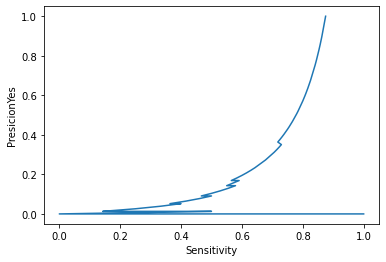

In [ ]:
ar=cls_cancer2.predict_proba(X_test)[:,0]
print(cls_cancer2.classes_)
fpr, tpr,thresholds=precision_recall_curve(Y_test,ar,pos_label='YES')
plt.plot(fpr, tpr)
plt.xlabel("Sensitivity")
plt.ylabel("PresicionYes")
plt.show()

In [ ]:
enc=LabelEncoder() 

Y_train= enc.fit_transform(Y_train) 
Y_test=enc.fit_transform(Y_test) 

In [ ]:
cls_cancer3=LogisticRegression()
cls_cancer3.fit(X_train,Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
print(accuracy_score(Y_train,cls_cancer3.predict(X_train)))

0.9219512195121952


In [ ]:
print(accuracy_score(Y_test,cls_cancer3.predict(X_test)))

0.9090909090909091


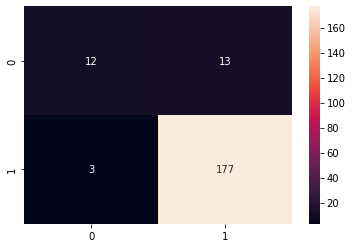

In [ ]:
pred_labels=cls_cancer3.predict(X_train)
cm=confusion_matrix(Y_train,pred_labels)
sns.heatmap(cm,annot=True,fmt='d')

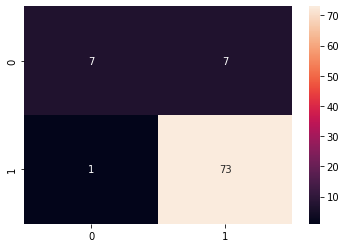

In [ ]:
pred_labels1=cls_cancer3.predict(X_test)
cm=confusion_matrix(Y_test,pred_labels1)
sns.heatmap(cm,annot=True,fmt='d')

In [ ]:
print(classification_report(Y_train,cls_cancer3.predict(X_train)))

              precision    recall  f1-score   support

           0       0.80      0.48      0.60        25
           1       0.93      0.98      0.96       180

    accuracy                           0.92       205
   macro avg       0.87      0.73      0.78       205
weighted avg       0.92      0.92      0.91       205



In [ ]:
print(classification_report(Y_test,cls_cancer3.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.50      0.64        14
           1       0.91      0.99      0.95        74

    accuracy                           0.91        88
   macro avg       0.89      0.74      0.79        88
weighted avg       0.91      0.91      0.90        88



[0 1]


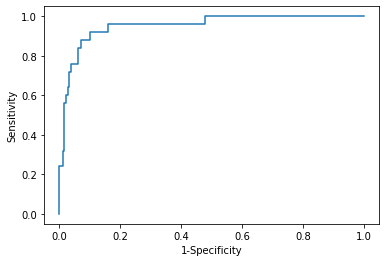

AUC= 0.04844444444444446


In [ ]:
ar=cls_cancer3.predict_proba(X_train)[:,0]
print(cls_cancer3.classes_)
fpr, tpr, thresholds =roc_curve(Y_train,ar,pos_label=0)
plt.plot(fpr, tpr)
plt.xlabel("1-Specificity")
plt.ylabel("Sensitivity")
plt.show()
auc_dt = roc_auc_score(Y_train,ar)
print("AUC=", auc_dt)

[0 1]


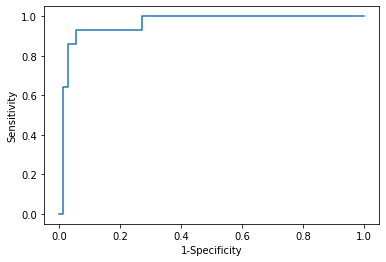

AUC= 0.03764478764478764


In [ ]:
ar=cls_cancer3.predict_proba(X_test)[:,0]
print(cls_cancer3.classes_)
fpr, tpr, thresholds =roc_curve(Y_test,ar,pos_label=0)
plt.plot(fpr, tpr)
plt.xlabel("1-Specificity")
plt.ylabel("Sensitivity")
plt.show()
auc_dt = roc_auc_score(Y_test,ar)
print("AUC=", auc_dt)

[0 1]


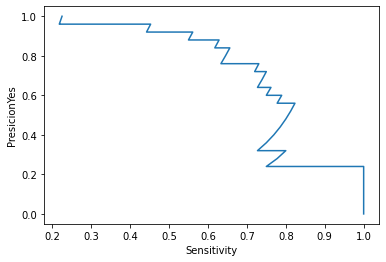

In [ ]:
ar=cls_cancer3.predict_proba(X_train)[:,0]
print(cls_cancer3.classes_)
fpr, tpr,thresholds=precision_recall_curve(Y_train,ar,pos_label=0)
plt.plot(fpr, tpr)
plt.xlabel("Sensitivity")
plt.ylabel("PresicionYes")
plt.show()

[0 1]


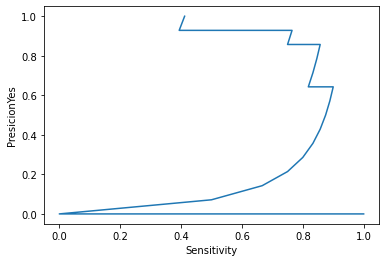

In [ ]:
ar=cls_cancer3.predict_proba(X_test)[:,0]
print(cls_cancer3.classes_)
fpr, tpr,thresholds=precision_recall_curve(Y_test,ar,pos_label=0)
plt.plot(fpr, tpr)
plt.xlabel("Sensitivity")
plt.ylabel("PresicionYes")
plt.show()

In [ ]:
df_cancer['LUNG_CANCER'] = df_cancer['LUNG_CANCER'].replace("YES",0)
df_cancer['LUNG_CANCER'] = df_cancer['LUNG_CANCER'].replace("NO",1)
df_cancer.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1.0,69.0,1.545126,2.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,0
1,1.0,74.0,2.000000,2.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,0
2,0.0,39.0,1.000000,2.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,1
3,1.0,63.0,1.545126,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,1
4,0.0,63.0,1.000000,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,1


In [ ]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   GENDER                 293 non-null    float64
 1   AGE                    293 non-null    float64
 2   SMOKING                293 non-null    float64
 3   YELLOW_FINGERS         293 non-null    float64
 4   ANXIETY                293 non-null    float64
 5   PEER_PRESSURE          293 non-null    float64
 6   CHRONIC DISEASE        293 non-null    float64
 7   FATIGUE                293 non-null    float64
 8   ALLERGY                293 non-null    float64
 9   WHEEZING               293 non-null    float64
 10  ALCOHOL CONSUMING      293 non-null    float64
 11  COUGHING               293 non-null    float64
 12  SHORTNESS OF BREATH    293 non-null    float64
 13  SWALLOWING DIFFICULTY  293 non-null    float64
 14  CHEST PAIN             293 non-null    float64
 15  LUNG_C

In [ ]:
I=df_cancer.loc[:,['SMOKING']].values 
L=df_cancer.loc[:,['LUNG_CANCER']].values
cls_cancer4=LinearRegression()
cls_cancer4.fit(I,L) 

LinearRegression()

In [ ]:
y_pred = cls_cancer4.predict(I)
y_pred

array([[0.1331058 ],
       [0.11211458],
       [0.15826195],
       [0.1331058 ],
       [0.15826195],
       [0.15826195],
       [0.1331058 ],
       [0.11211458],
       [0.11211458],
       [0.11211458],
       [0.11211458],
       [0.15826195],
       [0.1331058 ],
       [0.11211458],
       [0.11211458],
       [0.15826195],
       [0.11211458],
       [0.11211458],
       [0.1331058 ],
       [0.15826195],
       [0.11211458],
       [0.15826195],
       [0.11211458],
       [0.11211458],
       [0.1331058 ],
       [0.15826195],
       [0.11211458],
       [0.15826195],
       [0.1331058 ],
       [0.15826195],
       [0.11211458],
       [0.11211458],
       [0.11211458],
       [0.11211458],
       [0.15826195],
       [0.11211458],
       [0.15826195],
       [0.15826195],
       [0.11211458],
       [0.11211458],
       [0.11211458],
       [0.15826195],
       [0.15826195],
       [0.11211458],
       [0.11211458],
       [0.11211458],
       [0.11211458],
       [0.112

Text(0.5, 1.0, 'Lung_cancer Prediction')

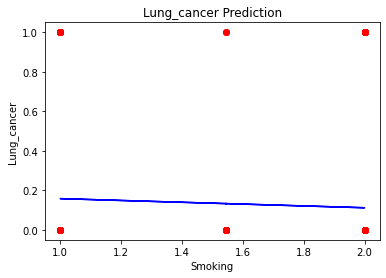

In [ ]:
plt.scatter(I,L,color='red',linestyle='-')
plt.plot(I,cls_cancer4.predict(I),color="blue")
plt.xlabel('Smoking')
plt.ylabel('Lung_cancer')
plt.title('Lung_cancer Prediction')

In [ ]:
print('Intercept of the model:',cls_cancer4.intercept_)
print('Coefficient of the line:',cls_cancer4.coef_)

Intercept of the model: [0.20440933]
Coefficient of the line: [[-0.04614738]]


In [ ]:
mse = mean_squared_error(I,L)

In [ ]:
rsq = r2_score(I,L)

In [ ]:
print('mean squared error :',mse)
print('r square :',rsq)

mean squared error : 2.3652496306201023
r square : -9.089668100008314


In [ ]:
cls_cancer5=AdaBoostClassifier()
cls_cancer5.fit(X_train,Y_train)

AdaBoostClassifier()

In [ ]:
print(accuracy_score(Y_train,cls_cancer5.predict(X_train)))

0.9365853658536586


In [ ]:
print(accuracy_score(Y_test,cls_cancer5.predict(X_test)))

0.8636363636363636


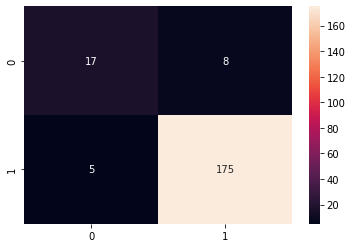

In [ ]:
pred_labels=cls_cancer5.predict(X_train)
cm=confusion_matrix(Y_train,pred_labels)
sns.heatmap(cm,annot=True,fmt='d')

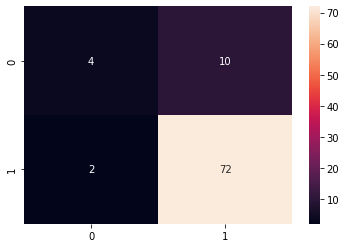

In [ ]:
pred_labels1=cls_cancer5.predict(X_test)
cm=confusion_matrix(Y_test,pred_labels1)
sns.heatmap(cm,annot=True,fmt='d')

In [ ]:
print(classification_report(Y_train,cls_cancer5.predict(X_train)))

              precision    recall  f1-score   support

           0       0.77      0.68      0.72        25
           1       0.96      0.97      0.96       180

    accuracy                           0.94       205
   macro avg       0.86      0.83      0.84       205
weighted avg       0.93      0.94      0.93       205



In [ ]:
print(classification_report(Y_test,cls_cancer3.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.50      0.64        14
           1       0.91      0.99      0.95        74

    accuracy                           0.91        88
   macro avg       0.89      0.74      0.79        88
weighted avg       0.91      0.91      0.90        88



[0 1]


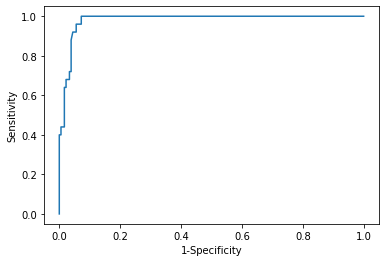

AUC= 0.01877777777777778


In [ ]:
ar=cls_cancer5.predict_proba(X_train)[:,0]
fpr, tpr, thresholds =roc_curve(Y_train,ar,pos_label=0)
plt.plot(fpr, tpr)
plt.xlabel("1-Specificity")
plt.ylabel("Sensitivity")
plt.show()
auc_dt = roc_auc_score(Y_train,ar)
print("AUC=", auc_dt)

[0 1]


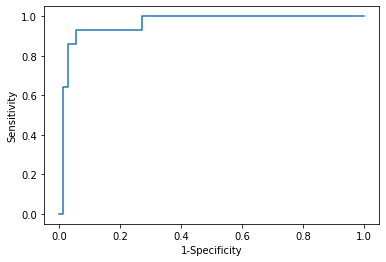

AUC= 0.03764478764478764


In [ ]:
ar=cls_cancer5.predict_proba(X_test)[:,0]
fpr, tpr, thresholds =roc_curve(Y_test,ar,pos_label=0)
plt.plot(fpr, tpr)
plt.xlabel("1-Specificity")
plt.ylabel("Sensitivity")
plt.show()
auc_dt = roc_auc_score(Y_test,ar)
print("AUC=", auc_dt)

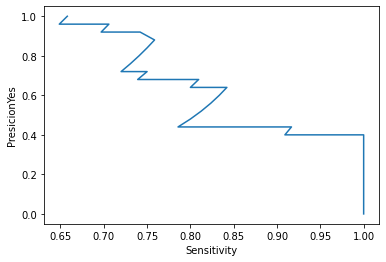

In [ ]:
ar=cls_cancer5.predict_proba(X_train)[:,0]
fpr, tpr,thresholds=precision_recall_curve(Y_train,ar,pos_label=0)
plt.plot(fpr, tpr)
plt.xlabel("Sensitivity")
plt.ylabel("PresicionYes")
plt.show()

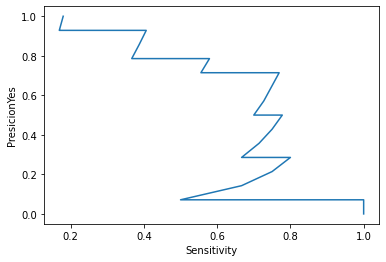

In [ ]:
ar=cls_cancer5.predict_proba(X_test)[:,0]
fpr, tpr,thresholds=precision_recall_curve(Y_test,ar,pos_label=0)
plt.plot(fpr, tpr)
plt.xlabel("Sensitivity")
plt.ylabel("PresicionYes")
plt.show()

In [ ]:
from xgboost import XGBClassifier
cls_cancer6= XGBClassifier()
cls_cancer6.fit(X_train,Y_train)

XGBClassifier()

In [ ]:
print(accuracy_score(Y_train,cls_cancer6.predict(X_train)))

0.975609756097561


In [ ]:
print(accuracy_score(Y_test,cls_cancer6.predict(X_test)))

0.9090909090909091


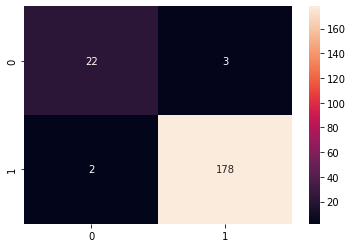

In [ ]:
pred_labels=cls_cancer6.predict(X_train)
cm=confusion_matrix(Y_train,pred_labels)
sns.heatmap(cm,annot=True,fmt='d')

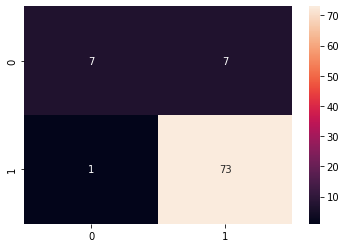

In [ ]:
pred_labels1=cls_cancer6.predict(X_test)
cm=confusion_matrix(Y_test,pred_labels1)
sns.heatmap(cm,annot=True,fmt='d')

In [ ]:
print(classification_report(Y_train,cls_cancer6.predict(X_train)))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90        25
           1       0.98      0.99      0.99       180

    accuracy                           0.98       205
   macro avg       0.95      0.93      0.94       205
weighted avg       0.98      0.98      0.98       205



In [ ]:
print(classification_report(Y_test,cls_cancer5.predict(X_test)))

              precision    recall  f1-score   support

           0       0.67      0.29      0.40        14
           1       0.88      0.97      0.92        74

    accuracy                           0.86        88
   macro avg       0.77      0.63      0.66        88
weighted avg       0.84      0.86      0.84        88



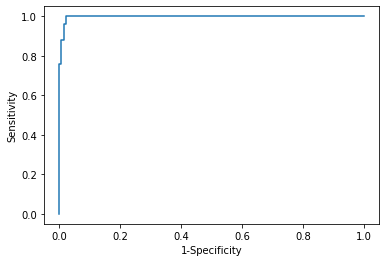

AUC= 0.0028888888888888888


In [ ]:
ar=cls_cancer6.predict_proba(X_train)[:,0]
fpr, tpr, thresholds =roc_curve(Y_train,ar,pos_label=0)
plt.plot(fpr, tpr)
plt.xlabel("1-Specificity")
plt.ylabel("Sensitivity")
plt.show()
auc_dt = roc_auc_score(Y_train,ar)
print("AUC=", auc_dt)

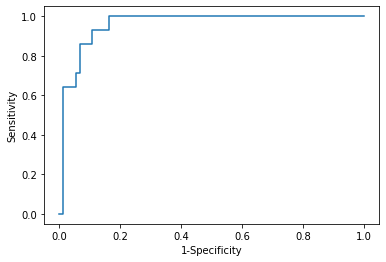

AUC= 0.041505791505791506


In [ ]:
ar=cls_cancer6.predict_proba(X_test)[:,0]
fpr, tpr, thresholds =roc_curve(Y_test,ar,pos_label=0)
plt.plot(fpr, tpr)
plt.xlabel("1-Specificity")
plt.ylabel("Sensitivity")
plt.show()
auc_dt = roc_auc_score(Y_test,ar)
print("AUC=", auc_dt)

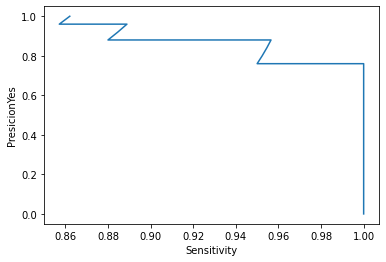

In [ ]:
ar=cls_cancer6.predict_proba(X_train)[:,0]
fpr, tpr,thresholds=precision_recall_curve(Y_train,ar,pos_label=0)
plt.plot(fpr, tpr)
plt.xlabel("Sensitivity")
plt.ylabel("PresicionYes")
plt.show()

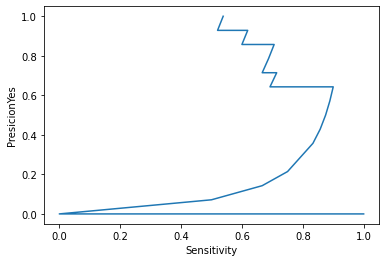

In [ ]:
ar=cls_cancer6.predict_proba(X_test)[:,0]
fpr, tpr,thresholds=precision_recall_curve(Y_test,ar,pos_label=0)
plt.plot(fpr, tpr)
plt.xlabel("Sensitivity")
plt.ylabel("PresicionYes")
plt.show()

In [ ]:
cls_cancer7= SVC(random_state=0,probability=True)
cls_cancer7.fit(X_train, Y_train)

SVC(probability=True, random_state=0)

In [ ]:
print(accuracy_score(Y_train,cls_cancer7.predict(X_train)))

0.8780487804878049


In [ ]:
print(accuracy_score(Y_test,cls_cancer7.predict(X_test)))

0.8409090909090909


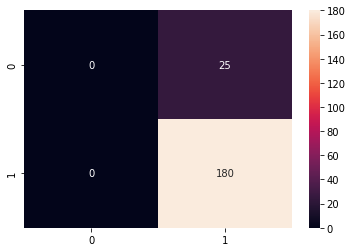

In [ ]:
pred_labels=cls_cancer7.predict(X_train)
cm=confusion_matrix(Y_train,pred_labels)
sns.heatmap(cm,annot=True,fmt='d')

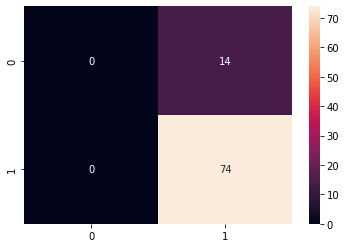

In [ ]:
pred_labels1=cls_cancer7.predict(X_test)
cm=confusion_matrix(Y_test,pred_labels1)
sns.heatmap(cm,annot=True,fmt='d')

In [ ]:
print(classification_report(Y_train,cls_cancer7.predict(X_train)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.88      1.00      0.94       180

    accuracy                           0.88       205
   macro avg       0.44      0.50      0.47       205
weighted avg       0.77      0.88      0.82       205



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(classification_report(Y_test,cls_cancer7.predict(X_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.84      1.00      0.91        74

    accuracy                           0.84        88
   macro avg       0.42      0.50      0.46        88
weighted avg       0.71      0.84      0.77        88



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


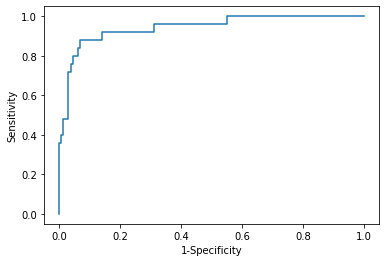

AUC= 0.05622222222222223


In [ ]:
ar=cls_cancer7.predict_proba(X_train)[:,0]
fpr, tpr, thresholds =roc_curve(Y_train,ar,pos_label=0)
plt.plot(fpr, tpr)
plt.xlabel("1-Specificity")
plt.ylabel("Sensitivity")
plt.show()
auc_dt = roc_auc_score(Y_train,ar)
print("AUC=", auc_dt)

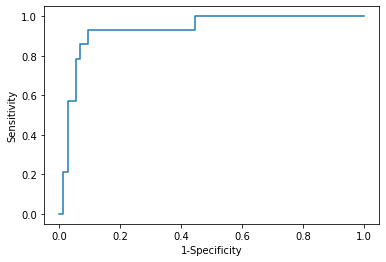

AUC= 0.06756756756756756


In [ ]:
ar=cls_cancer7.predict_proba(X_test)[:,0]
fpr, tpr, thresholds =roc_curve(Y_test,ar,pos_label=0)
plt.plot(fpr, tpr)
plt.xlabel("1-Specificity")
plt.ylabel("Sensitivity")
plt.show()
auc_dt = roc_auc_score(Y_test,ar)
print("AUC=", auc_dt)

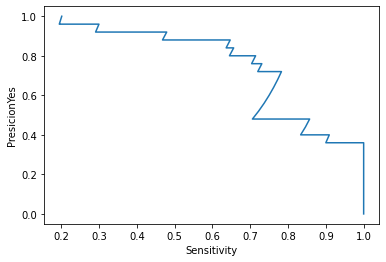

In [ ]:
ar=cls_cancer7.predict_proba(X_train)[:,0]
fpr, tpr,thresholds=precision_recall_curve(Y_train,ar,pos_label=0)
plt.plot(fpr, tpr)
plt.xlabel("Sensitivity")
plt.ylabel("PresicionYes")
plt.show()

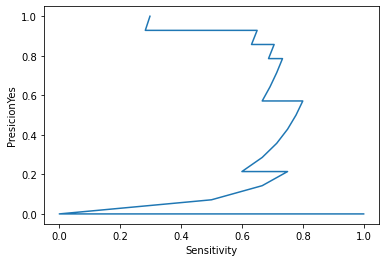

In [ ]:
ar=cls_cancer7.predict_proba(X_test)[:,0]
fpr, tpr,thresholds=precision_recall_curve(Y_test,ar,pos_label=0)
plt.plot(fpr, tpr)
plt.xlabel("Sensitivity")
plt.ylabel("PresicionYes")
plt.show()